## Problem Statement
### Housing Company
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house. 
- Determine the optimal value of lambda for ridge and lasso regression.

### Business Goal
The goal is to design a model using the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Initialization

In [1]:
import pandas as pd #to read the data in dataframes
import numpy as np #Numpy library needed for mathematical computation
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # Useful for data visualisation
%matplotlib inline

import datetime # Need to calculate the current year for derived variable.

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 100

In [2]:

housing_df = pd.read_csv('train.csv',header=0,low_memory=False)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Lets see data describtion
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

The data set contains **1460 Rows and 81 Columns**

In [4]:
#Check the shape
housing_df.shape

(1460, 81)

In this data set we have various data types like object, int64 and float64.

In [5]:
#Lets check the size
housing_df.size

118260

We have 81 columns which gives details about the house features and its sales price.

In [6]:
#Check the column names
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Check the data types 
housing_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
#Checking out the information 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#check the dimensions of data
housing_df.ndim

2

## Data Cleaning
  Under Data cleaning
- Check duplicate values
- Fix missing values
- Standardising Values
- Fix Invalid Values
- Filter data

### Check for Duplicate values:

In [10]:
housing_dfdup = housing_df
housing_dfdup.drop_duplicates(subset=None, inplace=True)

In [11]:
housing_df.shape, housing_dfdup.shape

((1460, 81), (1460, 81))

no duplicate rows in the dataset.

### Check for Null and Missing values:

In [12]:
(housing_df.isna().sum()).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [13]:
#Check the number of Null values in each column
(housing_df.isnull().sum()).sort_values(ascending=False)
(housing_df.isnull().sum() / housing_df.isnull().count()*100).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

Variables 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' have NaN values above 40%. So we can drop these columns.

In [14]:
# Dropping Columns with high missing values
housing_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [15]:
#Lets see what housing dataset contains
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [16]:
#Check whether any NA values are found in the data set
(housing_df.isna().sum()).sort_values(ascending=False)

LotFrontage      259
GarageType        81
GarageCond        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
PavedDrive         0
WoodDeckSF         0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
SaleCondition      0
BedroomAbvGr       0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
PoolArea           0
ScreenPorch        0
Functional         0
Fireplaces         0
2ndFlrSF           0
3SsnPorch          0
EnclosedPorch      0
GarageCars         0
GarageArea         0
OpenPorchSF        0
Id                 0
Heating            0
1stFlrSF           0
OverallCond        0
MSZoning           0
LotArea            0
Street       

Still we see NaN available in certain columns. So let us clean it up.

In [17]:
#Lets see what housing dataset contains
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [18]:
# In this data, 'Id' contain the serial number which is not useful to us. So drop it.
housing_df.drop(['Id'],axis=1,inplace=True)

In [19]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [20]:
#Lets see the first 15 rows which has Nan values.
(housing_df.isnull().sum()).sort_values(ascending=False).head(15)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
dtype: int64

In [21]:
#On analysing 'LotFrontage', we can see some outliers present
housing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
#Lets check the mean of this column. But we see that max value looks like outlier.
housing_df.LotFrontage.mean()

70.04995836802665

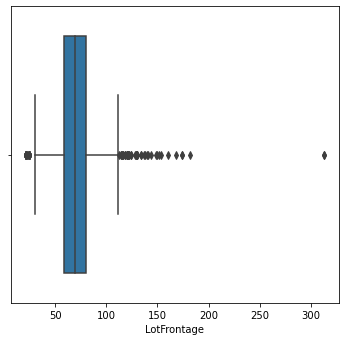

In [23]:
#We could visualize the outlier in this boxplot.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotFrontage', data = housing_df)
plt.show()

In [24]:
#Lets use median to impute the mising value for 'LotFrontage'
housing_df['LotFrontage']= housing_df.LotFrontage.fillna(housing_df.LotFrontage.median())

In [25]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are NaN. So replacing NANs with 'No Garage'.
# as per the data set.
gar_col = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in gar_col:
    housing_df[col].fillna('No Garage', inplace=True)

In [26]:
#Lets see how the value spans out for these 4 columns.
housing_df[gar_col].value_counts()

GarageType  GarageFinish  GarageQual  GarageCond
Attchd      RFn           TA          TA            361
Detchd      Unf           TA          TA            293
Attchd      Fin           TA          TA            272
            Unf           TA          TA            218
No Garage   No Garage     No Garage   No Garage      81
BuiltIn     Fin           TA          TA             58
            RFn           TA          TA             24
Detchd      RFn           TA          TA             19
            Unf           Fa          Fa             17
                                      TA             16
                          TA          Fa             13
            Fin           TA          TA             12
Basment     Unf           TA          TA              7
CarPort     Unf           TA          TA              7
Basment     RFn           TA          TA              6
BuiltIn     Unf           TA          TA              5
Attchd      RFn           Gd          TA              5

In [27]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' has NAN 
# when there is 'No Basement'. So impute with this value as per data set.
base_col = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for column in base_col:
    housing_df[column].fillna('No Basement', inplace=True)

In [28]:
#We could see the values been replaced with 'No Basement' for basement features.
housing_df[base_col].value_counts()

BsmtExposure  BsmtFinType2  BsmtQual  BsmtFinType1  BsmtCond
No            Unf           TA        Unf           TA          148
                            Gd        Unf           TA          136
                                      GLQ           TA          126
Av            Unf           Gd        GLQ           TA           74
No            Unf           TA        ALQ           TA           73
                                                               ... 
Gd            Unf           TA        LwQ           Fa            1
                                      GLQ           Gd            1
                                      BLQ           Gd            1
                            Gd        Unf           Gd            1
No Basement   Unf           Gd        Unf           TA            1
Length: 181, dtype: int64

In [29]:
#Lets check still how many more columns need to be imputed.
(housing_df.isnull().sum()).sort_values(ascending=False).head(15)

GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
YrSold            0
HalfBath          0
SaleType          0
SaleCondition     0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
FullBath          0
MoSold            0
BsmtHalfBath      0
dtype: int64

In [30]:
#GarageYrBlt contain the year of the Garage Built. And the value looks ok without any outliers.
# So we can impute the missing value with mean.
housing_df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [31]:
# Impute the missing value with mean.
housing_df['GarageYrBlt']= housing_df.GarageYrBlt.fillna(housing_df.GarageYrBlt.mean())

In [32]:
#Analysis the column MasVrnArea
housing_df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [33]:
#We see outlier in this column. So use median for imputation.
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())

In [34]:
#Analysis the column MasVrnType
housing_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [35]:
#Check the missing values
(housing_df.isnull().sum()).sort_values(ascending=False).head()

MasVnrType    8
Electrical    1
MSSubClass    0
HalfBath      0
Fireplaces    0
dtype: int64

In [36]:
#Fill the mising values with mode since it is categorical variable.
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna(housing_df.MasVnrType.mode()[0])

In [37]:
#let us the check Electrical column
housing_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
#Fill the mising values with mode since it is categorical variable.
housing_df['Electrical'] = housing_df.Electrical.fillna(housing_df.Electrical.mode()[0])

In [39]:
#Let us check whether we have any NaN values. The data looks clean.
(housing_df.isna().sum()).sort_values(ascending=False).head()

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

All the NaN and missing values are cleaned. Now the data set looks fine for missing values.

In [40]:
#Let us analyze the dependent variable.
housing_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

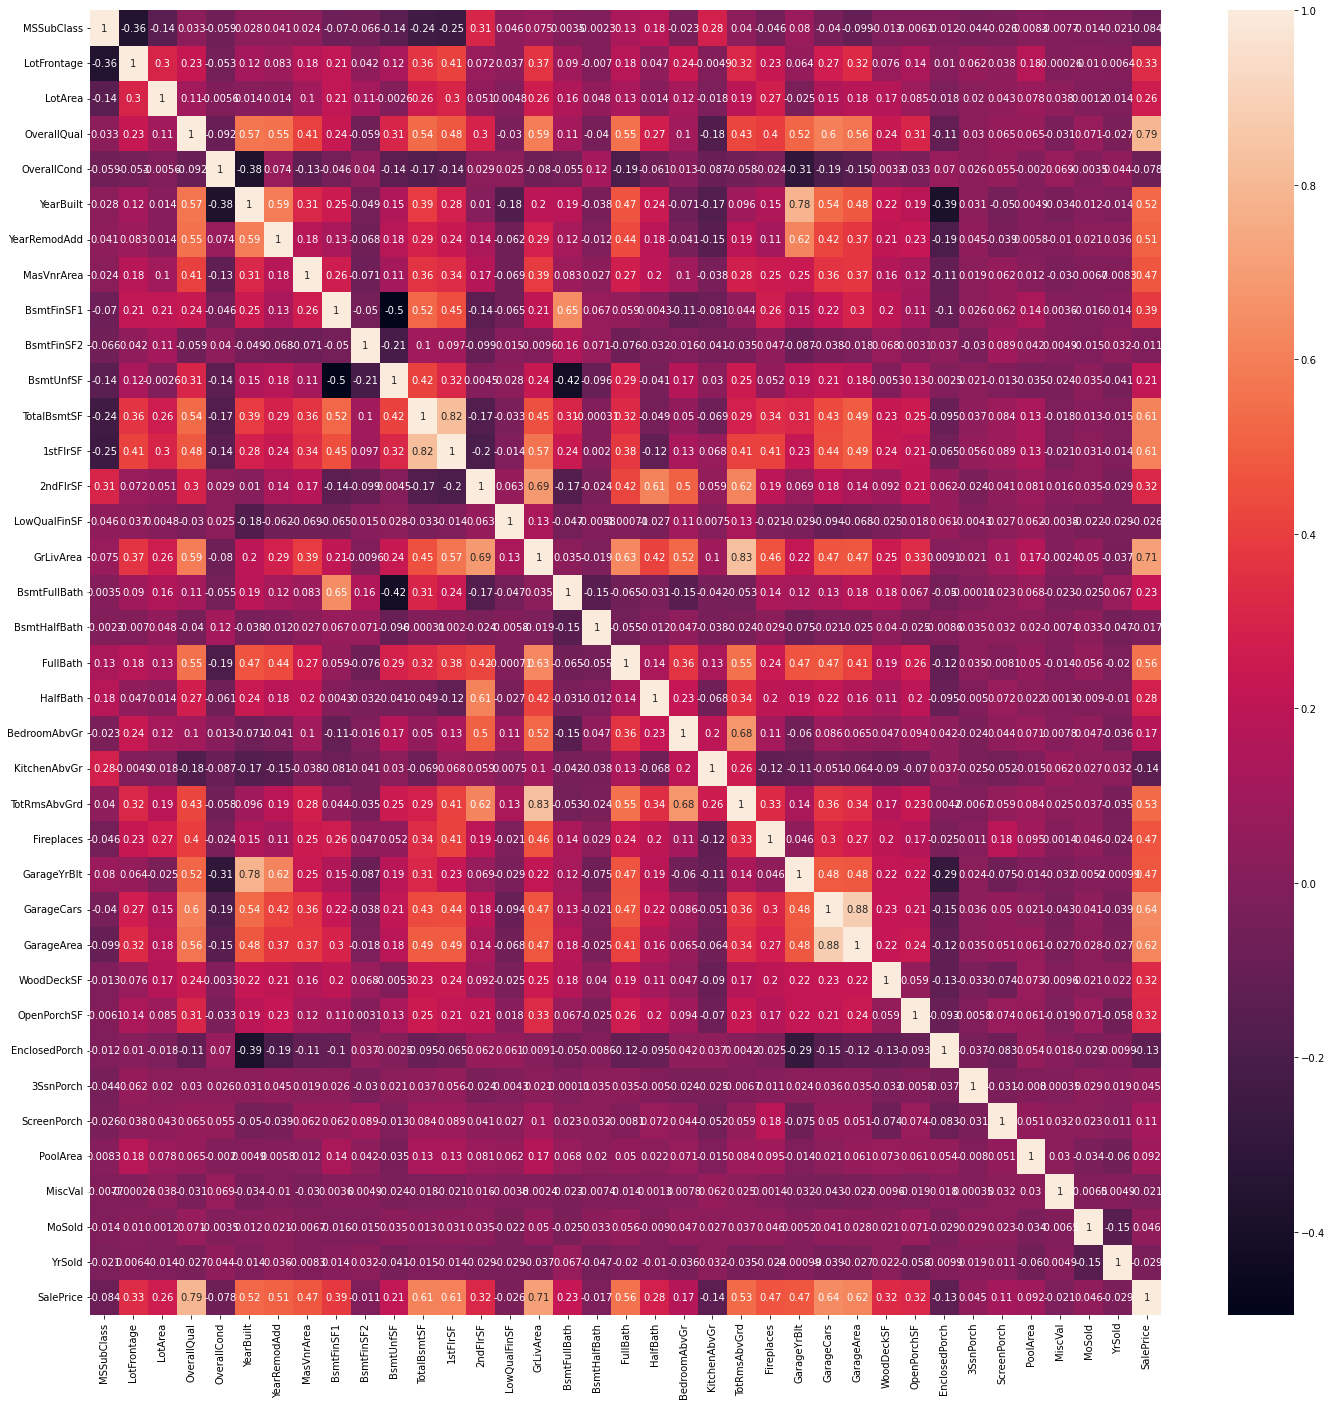

In [41]:
#Let us plot heatmap to see how the data set looks
plt.figure(figsize=(24, 24))
sns.heatmap(housing_df.corr(), annot = True)

In [42]:
#Use corr to see how the variables are correlated together.
housing_df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt      0.080187     0.064370 -0.024812     0.518018    -0.306169   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.116685      0.083348    0.178469    0.214367    0.042463   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [43]:
#Let us the data types of data set.
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

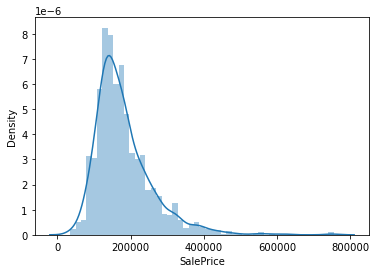

In [44]:
#Let us visualize how the dependent variable 'SalePrice' spans out.
sns.distplot(housing_df['SalePrice']) 
plt.show()

We could see that the SalePrice is skewed to right side. So we need to clean up the skewness.

In [45]:
#skewness and kurtosis
print("Skewness: %f" % housing_df['SalePrice'].skew())

Skewness: 1.882876


In [46]:
housing_df['SalePrice']=np.log(housing_df.SalePrice) #tranforming to form normal disribution

In [47]:
housing_df.SalePrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

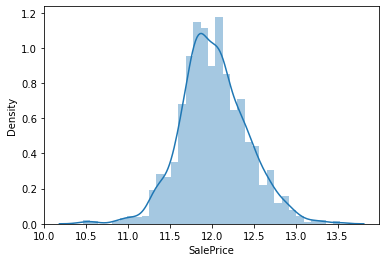

In [48]:
#Plotting to check Normal Distribution of SalePrice.
sns.distplot(housing_df['SalePrice']) 
plt.show()

In Dataset, we could see the columns 'MSSubClass', 'OverallQual' and 'OverallCond' have numeric data for categorical representation. So let us convert it into categorical data for creating dummies.

In [49]:
#changing num to categorical so as to form these as dummy variables 
housing_df['MSSubClass']=housing_df['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [50]:
#Check whether the numeric value is converted to categorical data.
housing_df.MSSubClass.head()

0               2-STORY 1946 & NEWER
1    1-STORY 1946 & NEWER ALL STYLES
2               2-STORY 1946 & NEWER
3               2-STORY 1945 & OLDER
4               2-STORY 1946 & NEWER
Name: MSSubClass, dtype: object

In [51]:
#changing num to categorical so as to form these as dummy variables
housing_df['OverallQual']=housing_df['OverallQual'].map({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [52]:
#changing num to categorical so as to form these as dummy variables
housing_df['OverallCond']=housing_df['OverallCond'].map({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [53]:
#Let us see how data looks
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     At

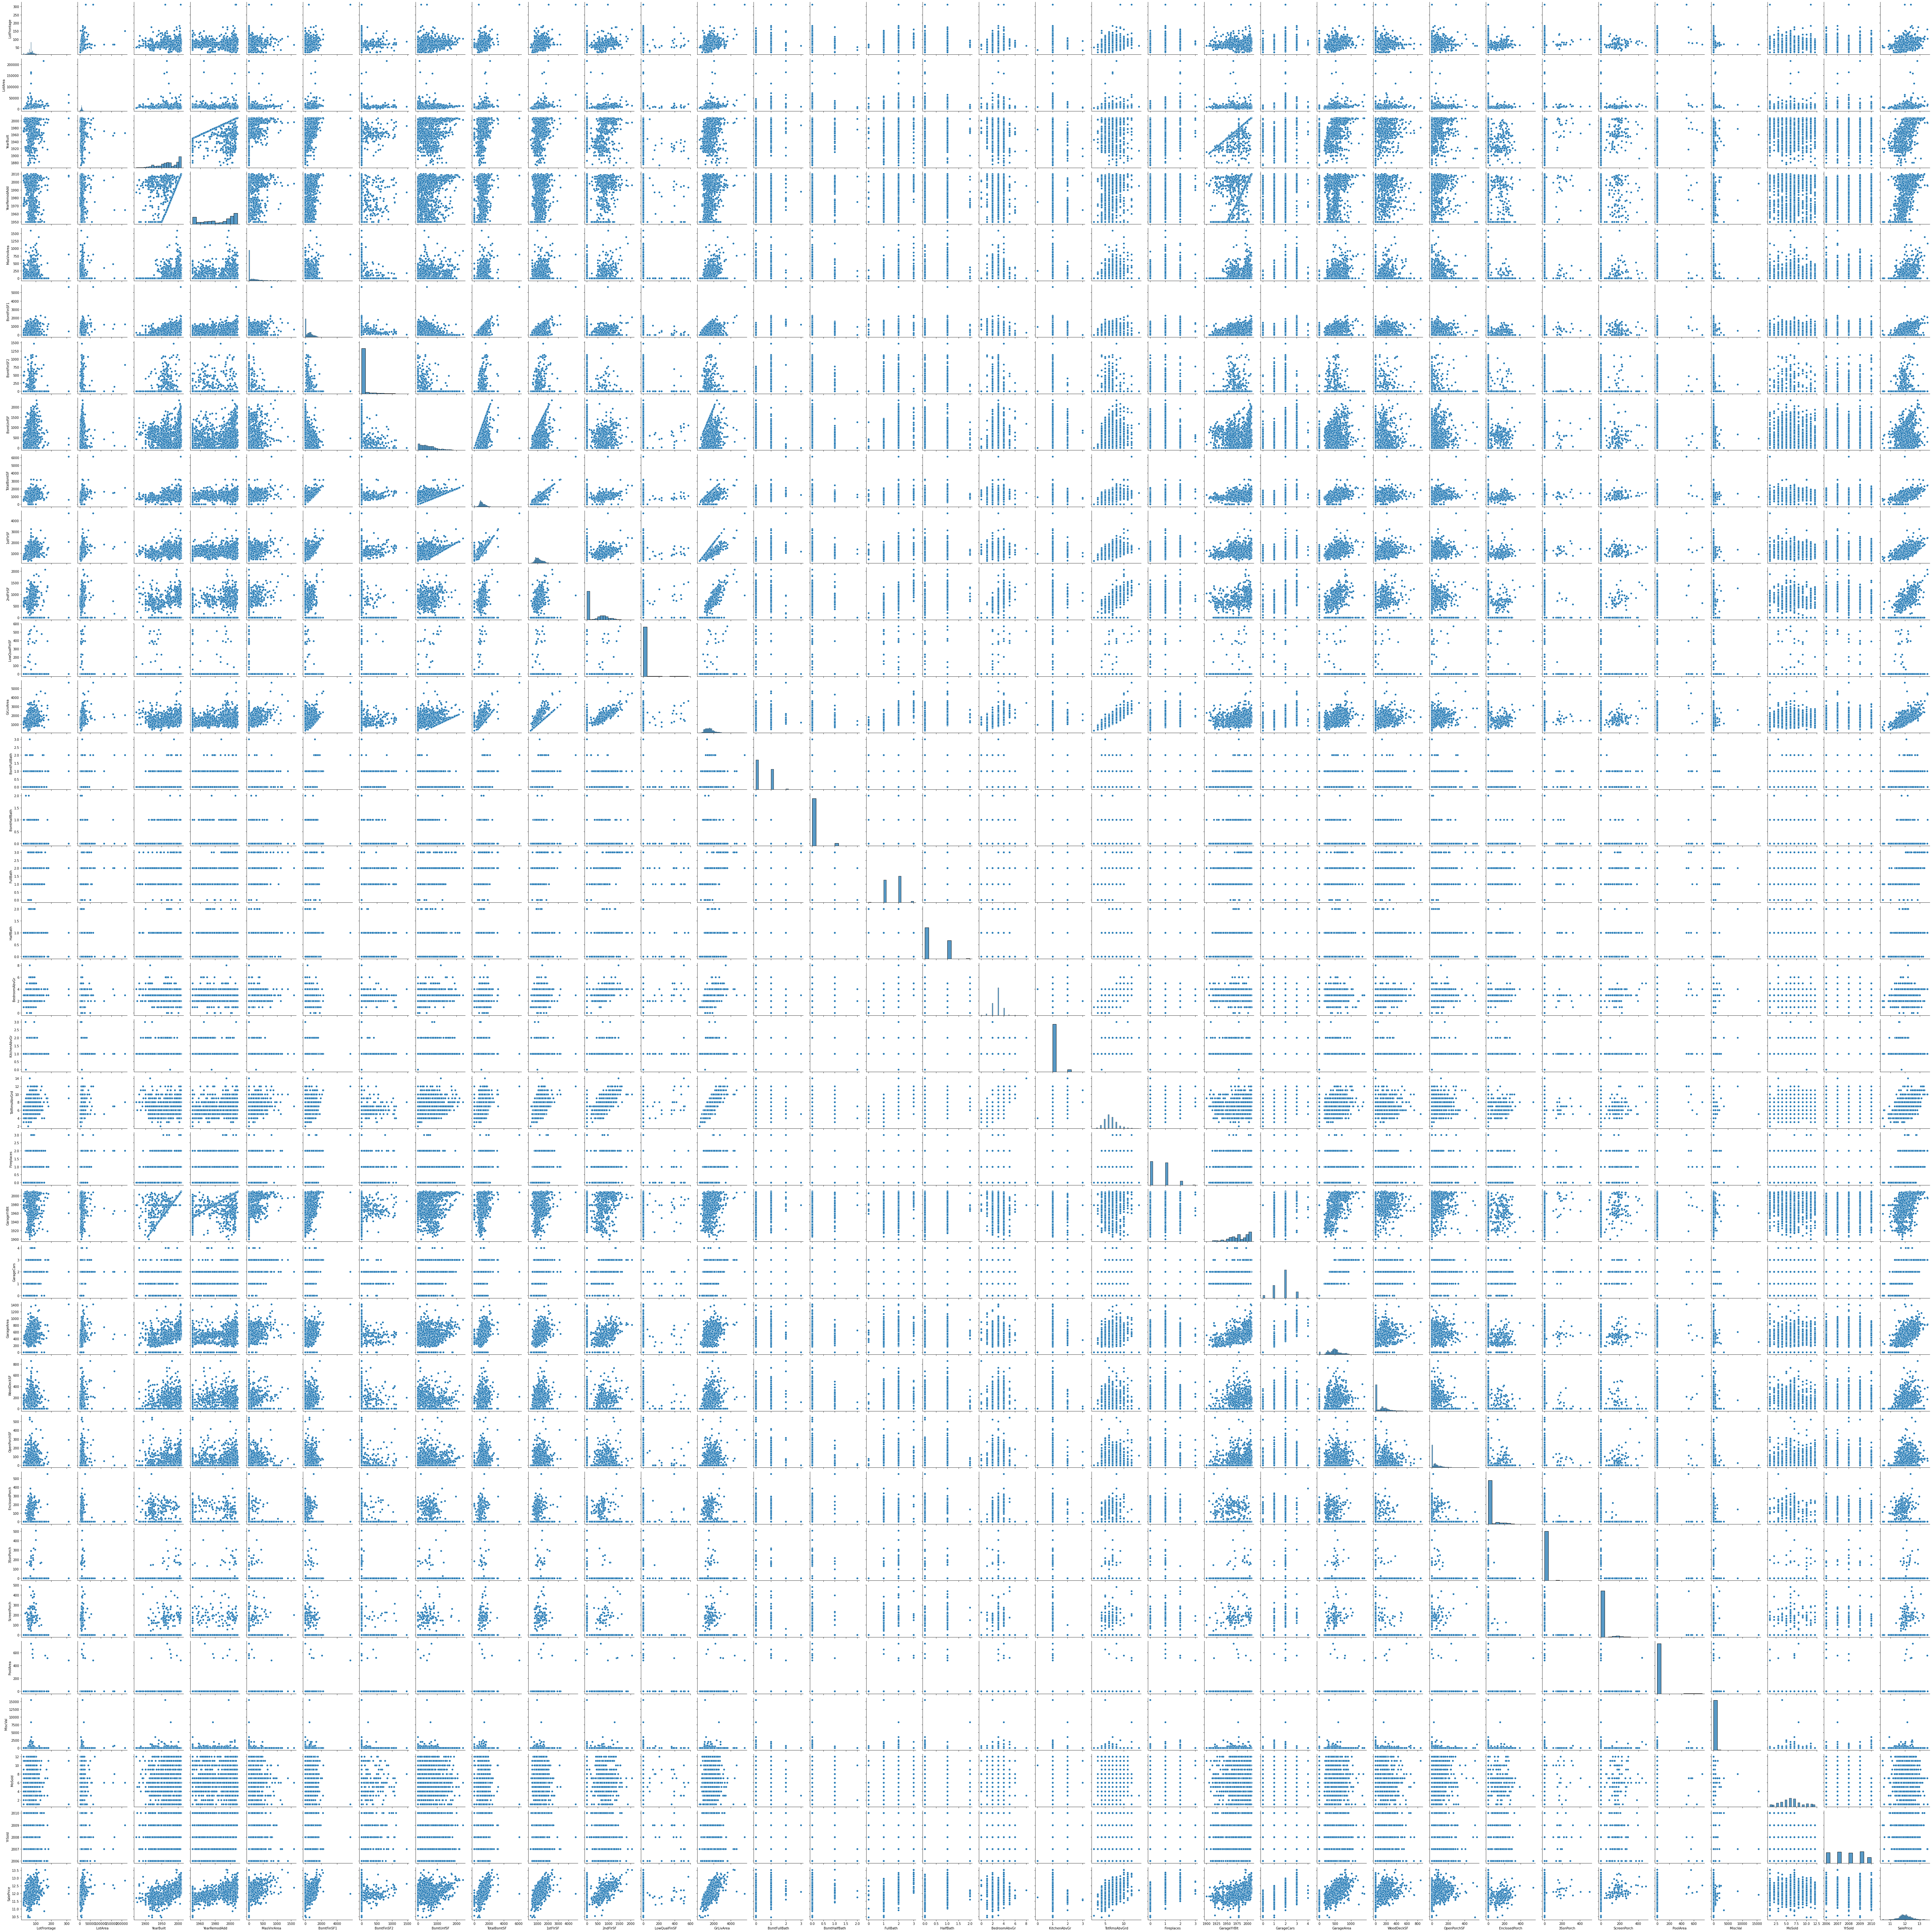

In [54]:
#Let us plot and see how variables are dependent. Since we have lot of variables, we have a larger
#plot
sns.pairplot(housing_df[list(housing_df)])
plt.show()

### Categorical Variable Analysis using Bivariate Analysis:
Let us check how the categorical data influences the SalePrice of the houses. Let us visualize and see whether do we have any skewness in the data. We will drop the columns with high skewness.

In [55]:
#Get all the categorical data present in the data set. So let us plot and see how does it influence 
# the sales of the house.
cat_var = housing_df.select_dtypes(include=['object'])
cat_var.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

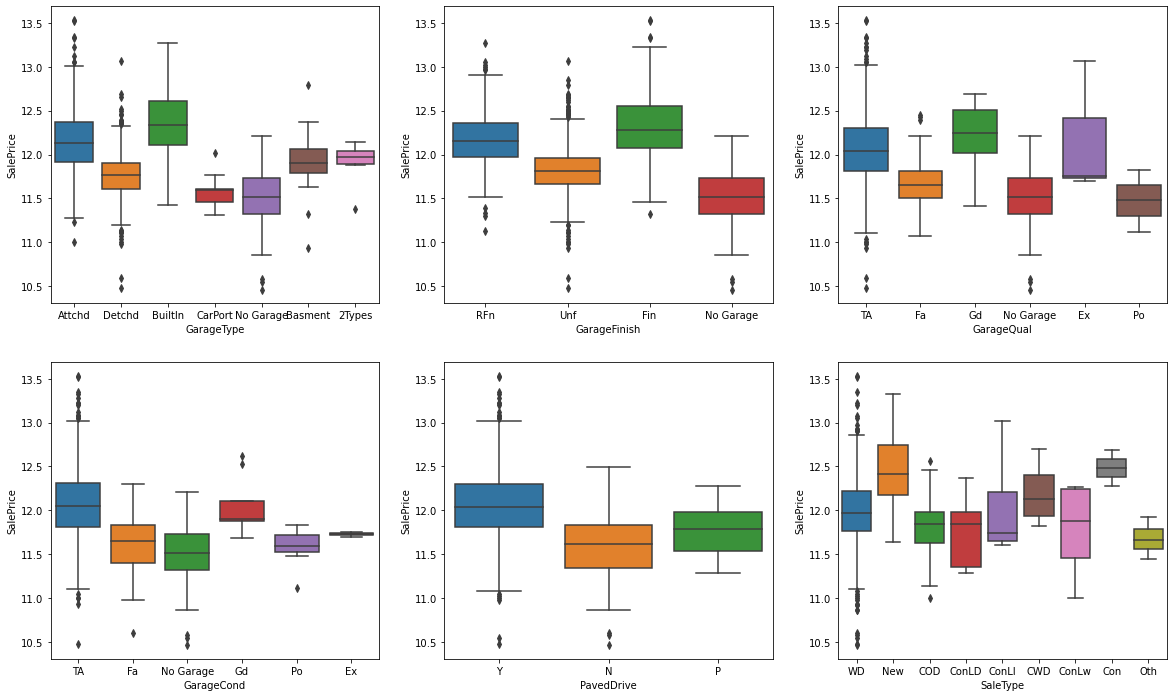

In [56]:
#Create boxplot for the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing_df)
plt.show()

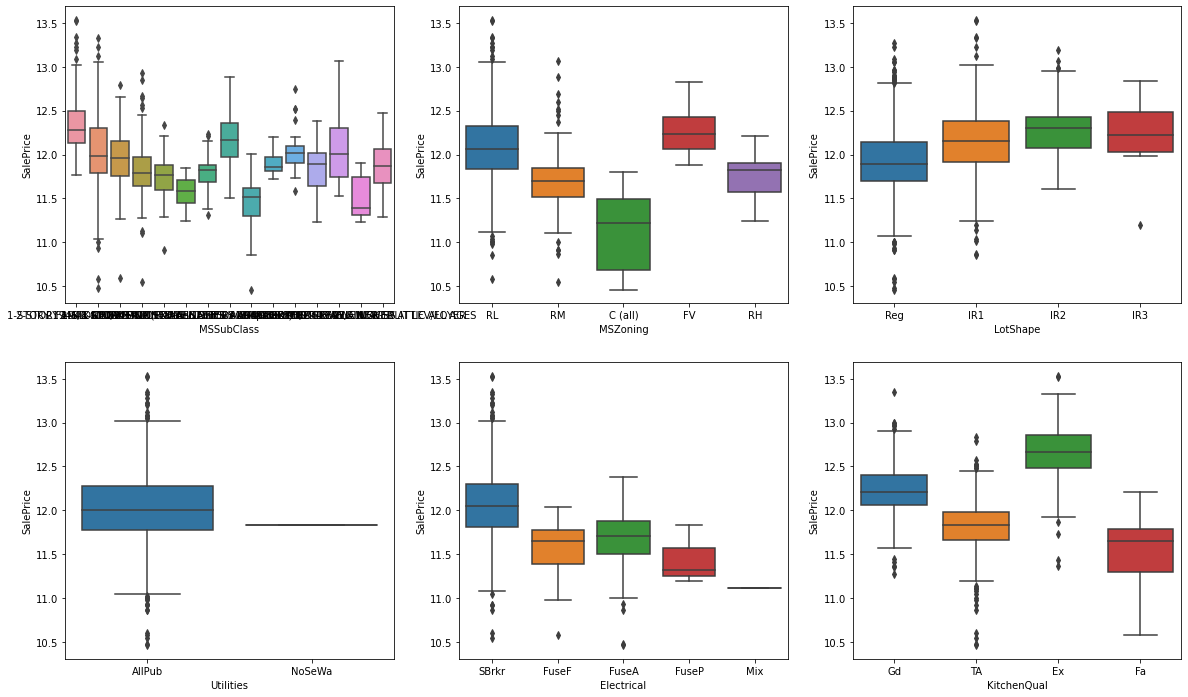

In [57]:
#Create boxplot for the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing_df)
plt.show()

We could see lots of outliers present in the data. We need to clean the outlier wherever applicable.

## Drop columns if highly skewed
Let us drop the columns which is highly skewed by plot the data and check for categorical variables dependent upon its features.

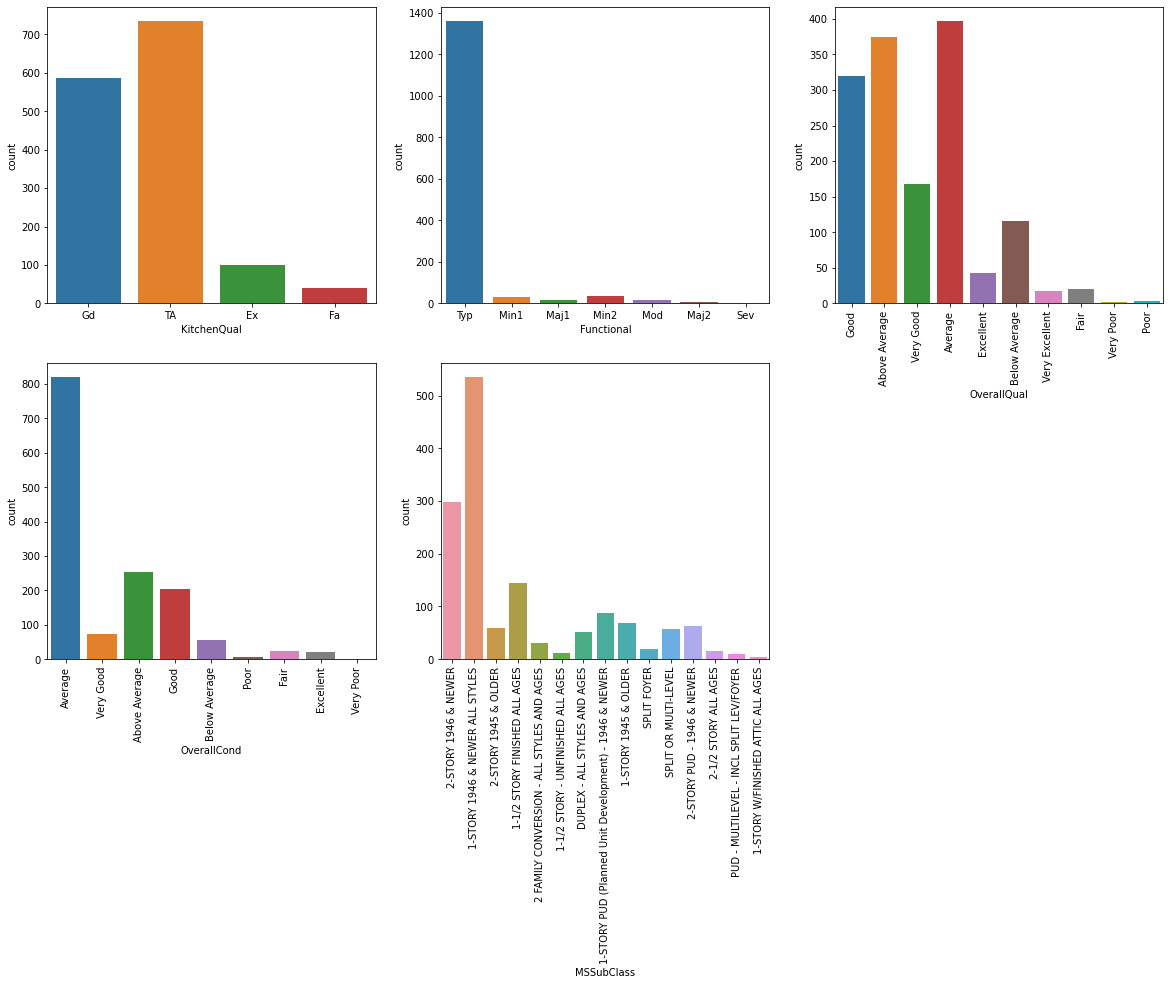

In [58]:
#Let us plot and check how the features of the house influence the sale price. Also we will check the
# skewness
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = housing_df)
plt.xticks(rotation=90)
plt.show()

Here in 'Functional' column, we see that data is skewed towards Typical Functionality and other types are less. So let us drop this column.

In [59]:
# Dropping highly skewed column 
housing_df.drop(['Functional'],axis=1,inplace=True)

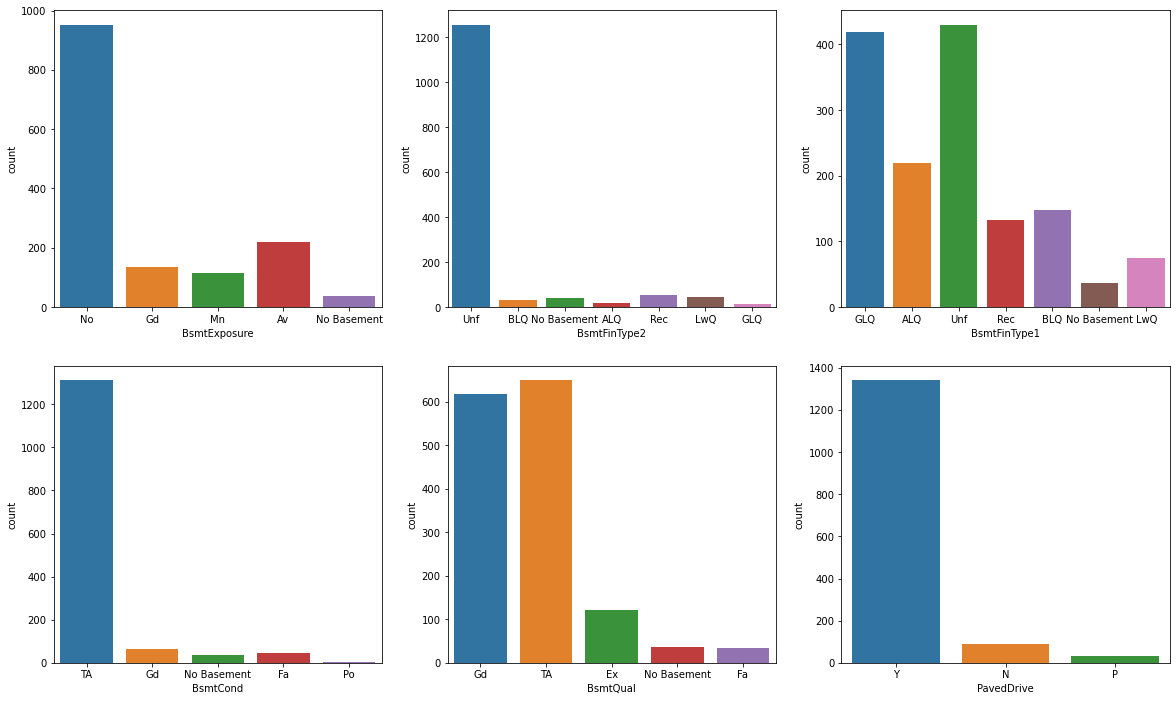

In [60]:
#Let us plot for features of Basement of house
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing_df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing_df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing_df)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing_df)
plt.show()

Using the above plots, we could see that **'BsmtFinType2','PavedDrive','BsmtCond'** are highly skewed. So let us drop these columns.

In [61]:
housing_df.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

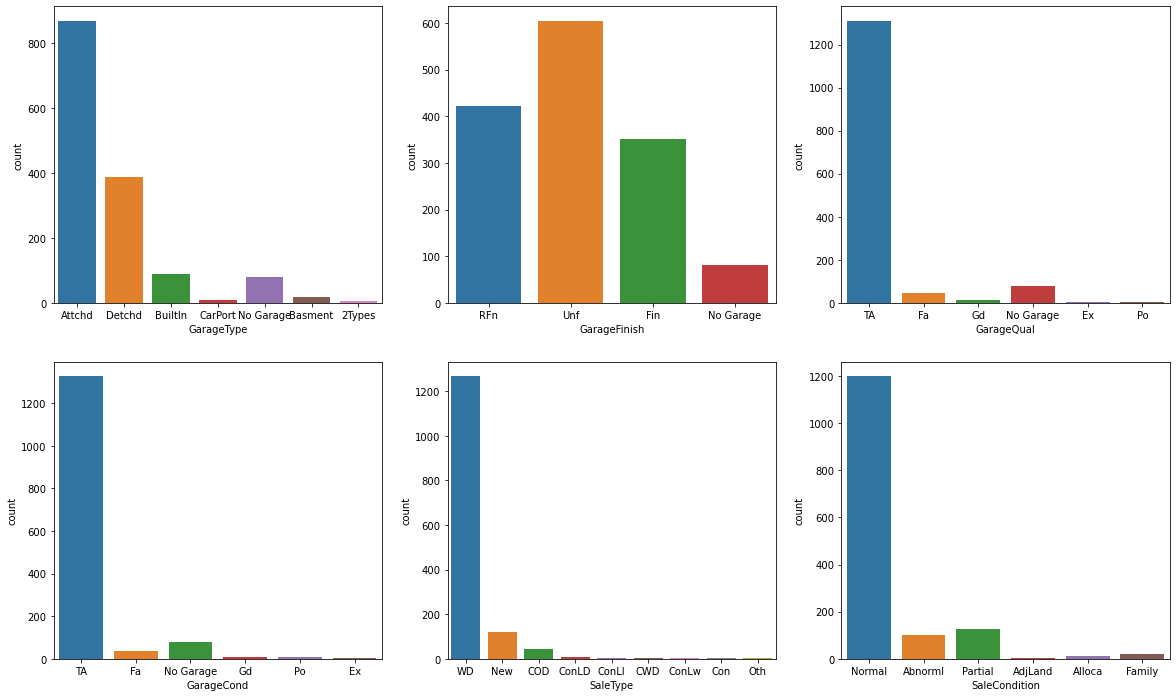

In [62]:
#Plotting for the features of Garage of house.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing_df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing_df)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing_df)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing_df)
plt.show()

In the above plot, we see 'GarageType' has few values of **'Basment','CarPort','2Types'**. So let us replace this value with others. So we will have less skewness in data. Similarly for 'SaleCondition', we will replace **'Family','Alloca','AdjLand'** with **Others**.
Also let us remove highly skewed columns **'GarageQual','GarageCond','SaleType'**.

In [63]:
housing_df['GarageType'] = housing_df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing_df['SaleCondition'] = housing_df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

# Dropping highly skewed column 
housing_df.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

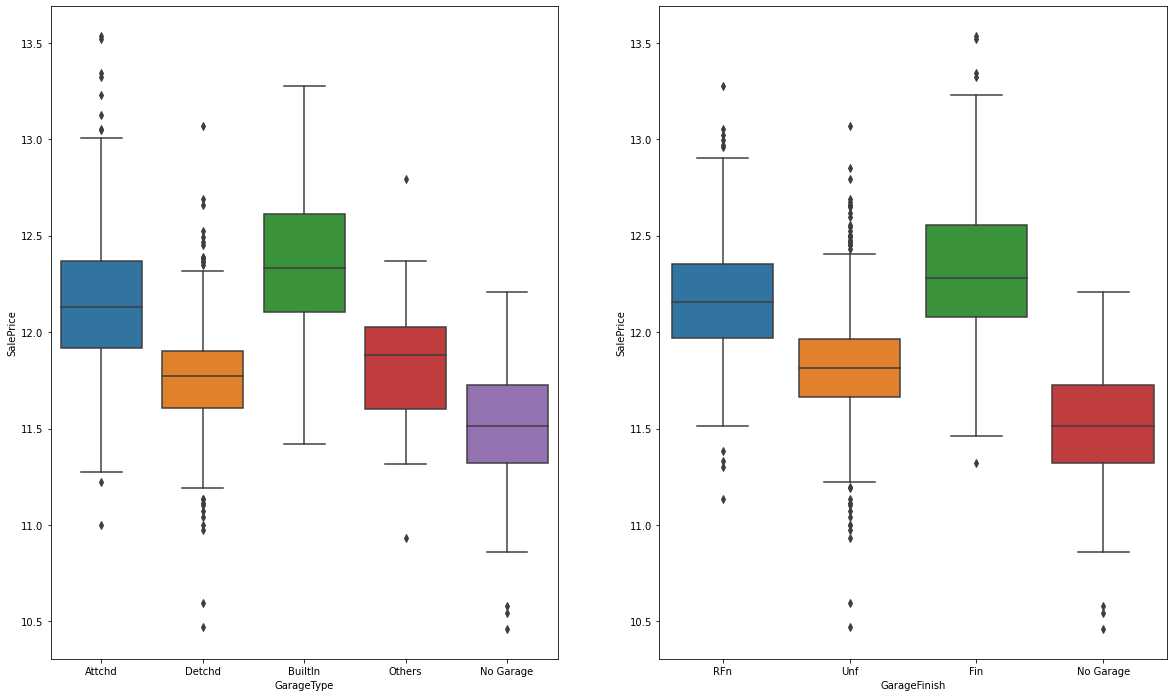

In [64]:
#Let's see effect of Garage type and GarageFinish on SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = housing_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_df)
plt.show()

Price of Builtin Garagetype and Finished garage is the highest in the above plot.


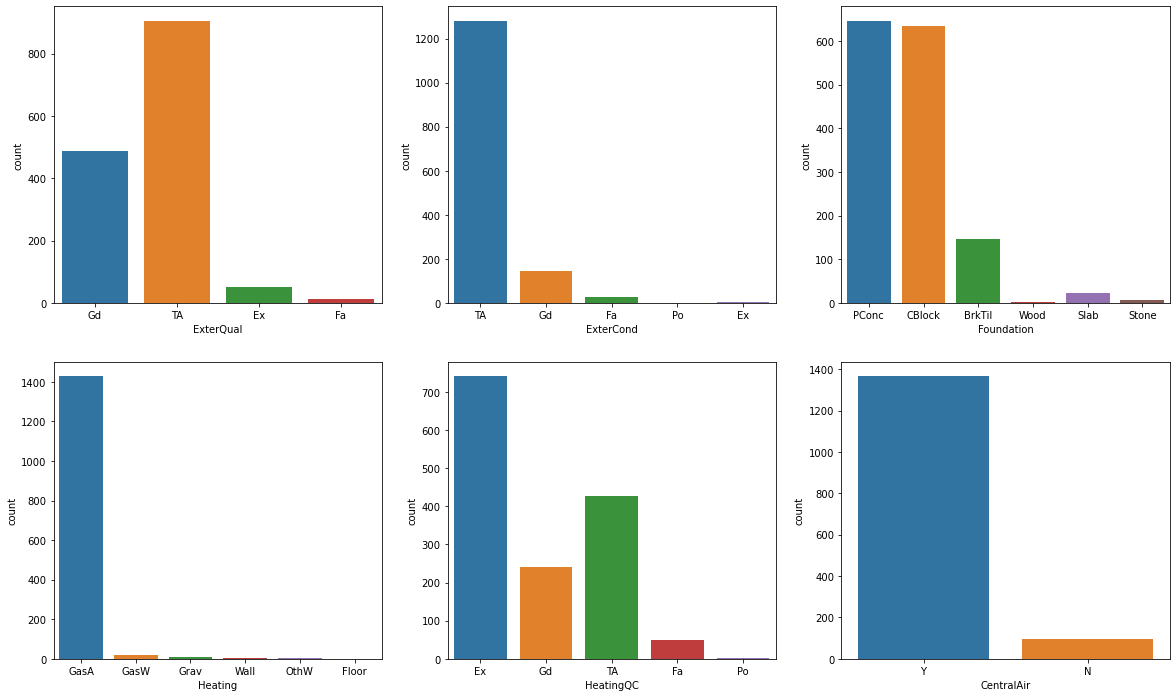

In [65]:
#Plotting for the features of Air, Heating and Foundation.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing_df)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing_df)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing_df)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing_df)
plt.show()

In the column 'Foundation', the fewer values **'Slab','Stone','Wood'** are replaced with Others. And let us drop the highly skewed columns **'CentralAir','Heating','ExterCond'**.

In [66]:
housing_df['Foundation'] = housing_df['Foundation'].replace(['Slab','Stone','Wood'],'Others')
# Dropping highly skewed column 
housing_df.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

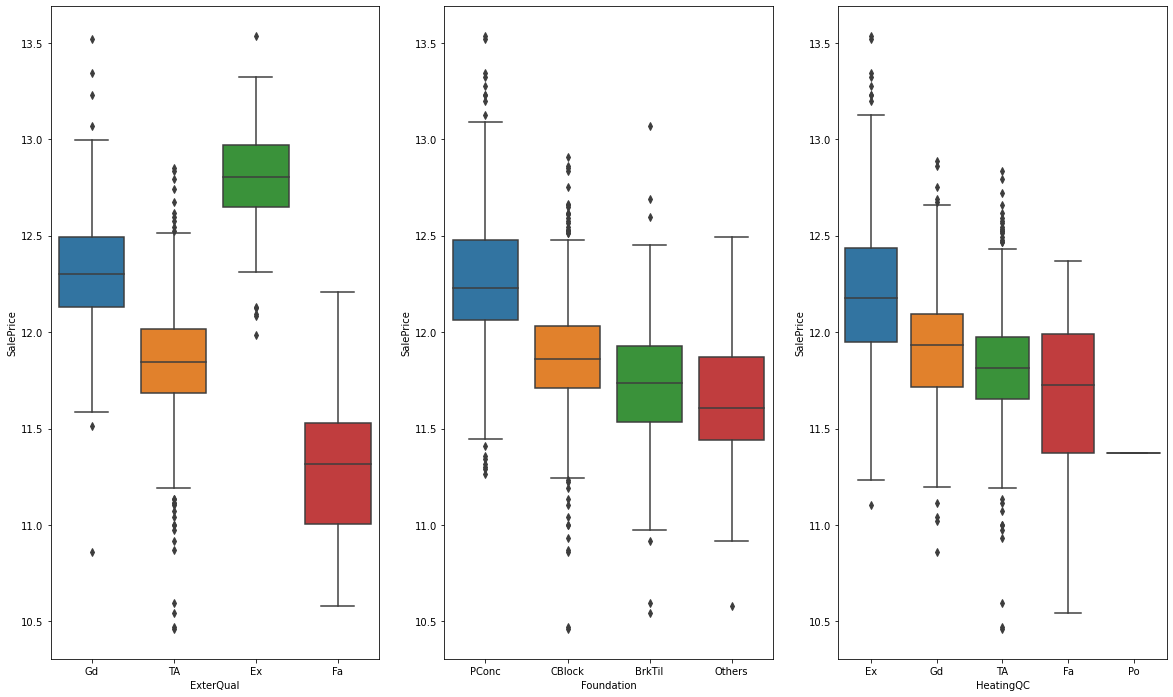

In [67]:
#Let's see effect of ExterQual, Foundation and HeatingQC on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing_df)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing_df)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing_df)
plt.show()

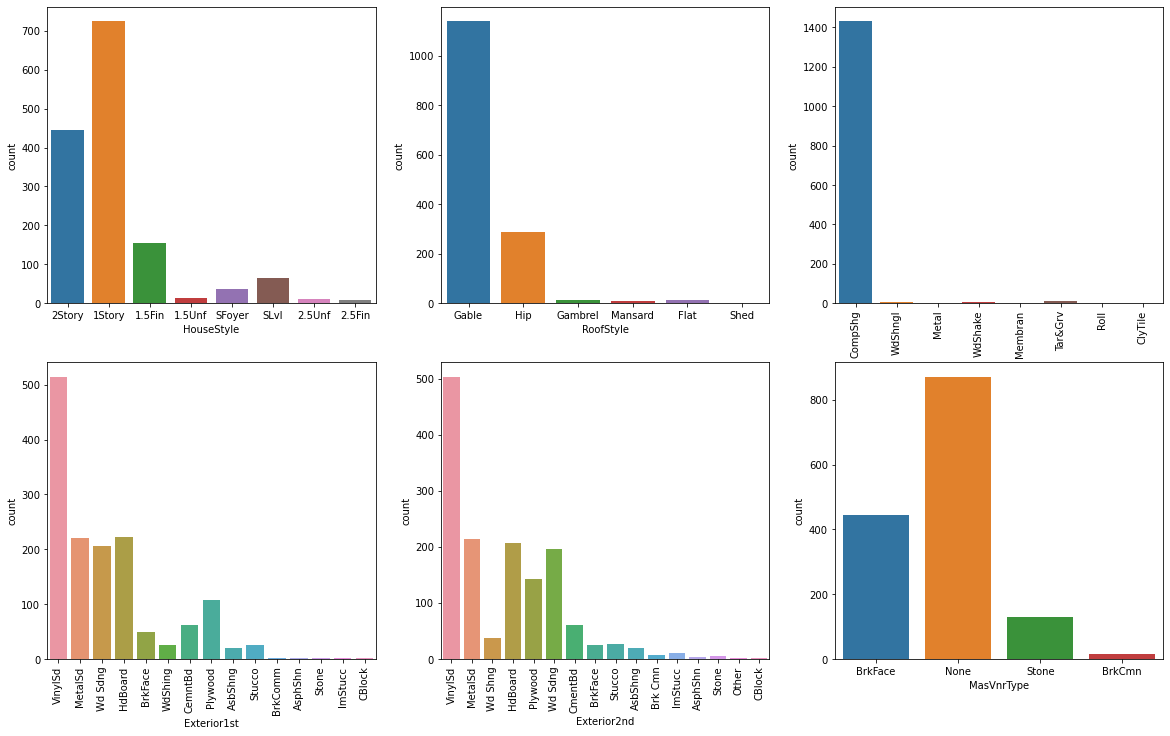

In [68]:
#Plot data for categorical variable of style of house, roof and exterior design
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing_df)
plt.show()

Let us fill the lesser values with 'Others' value for **'HouseStyle', 'RoofStyle',  'Exterior1st' and 'Exterior2nd'** columns and drop the highly skewed column  'RoofMatl'.

In [69]:
#Replacing certain items to reduce skewness
housing_df['HouseStyle'] = housing_df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing_df['RoofStyle'] = housing_df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing_df['Exterior1st'] = housing_df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing_df['Exterior2nd'] = housing_df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
# Dropping highly skewed column 
housing_df.drop(['RoofMatl'],axis=1,inplace=True)

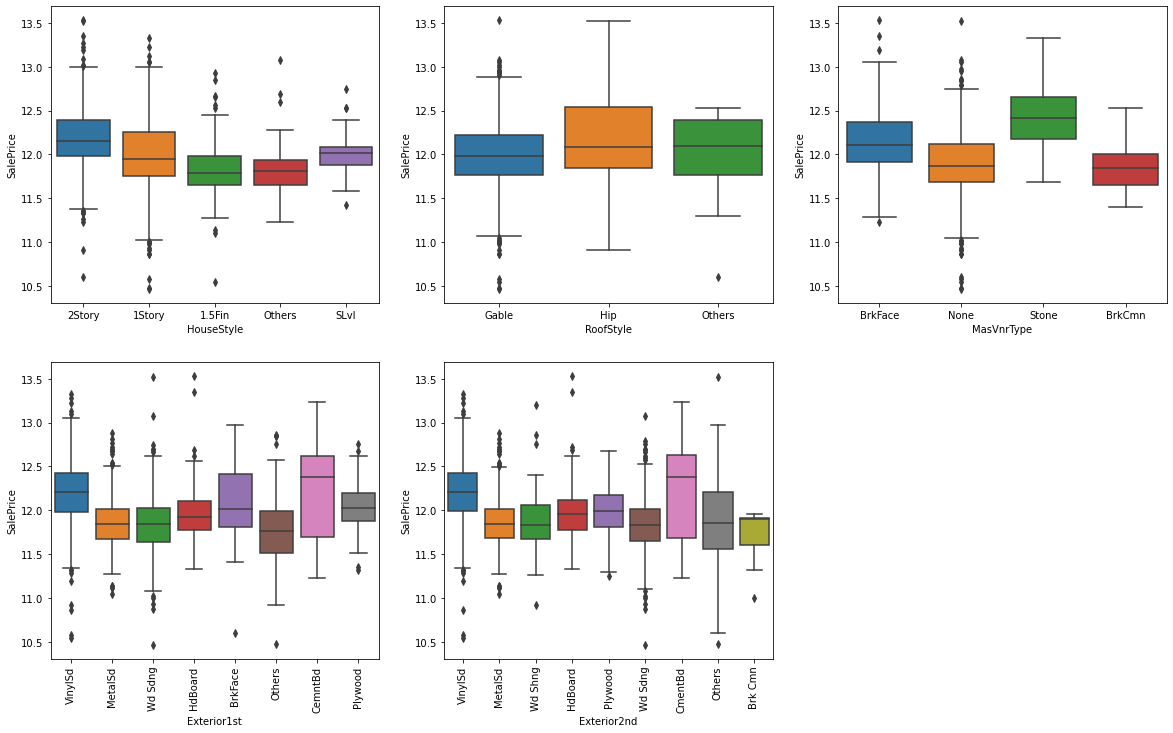

In [70]:
#Plot data for styles of House, Roof and exterior features of house.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing_df)
plt.xticks(rotation=90)
plt.show()

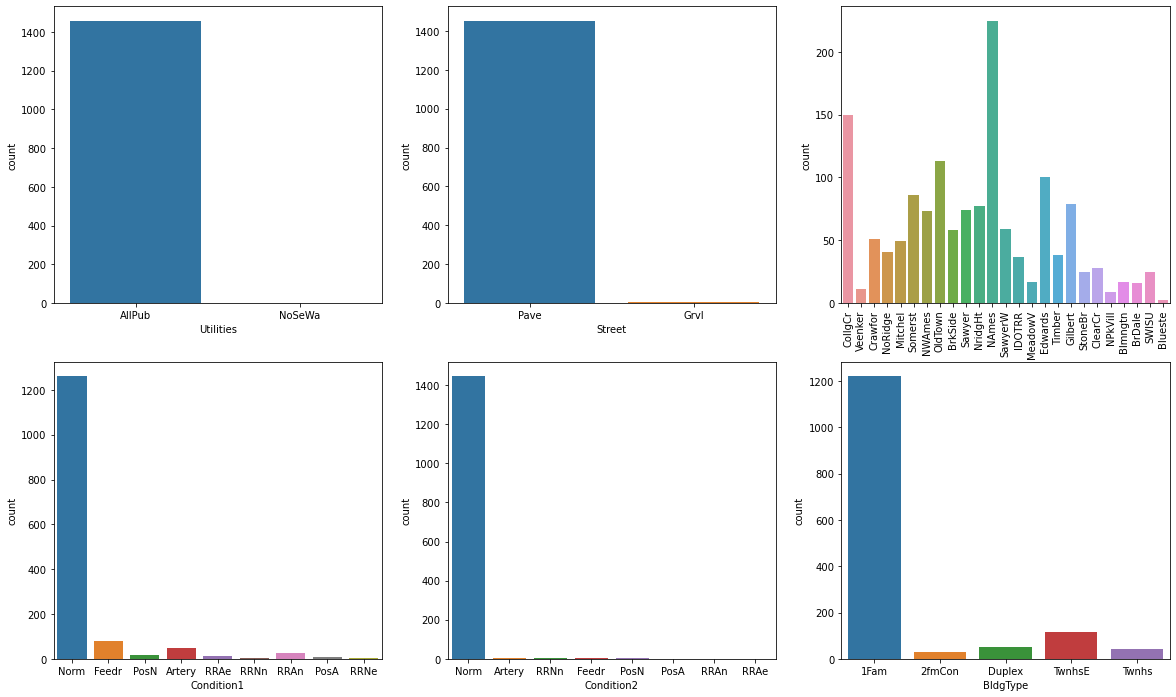

In [71]:
#Plotting data dependent upon other features of house.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing_df)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing_df)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing_df)
plt.show()


In [72]:
# Dropping highly skewed column 
housing_df.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

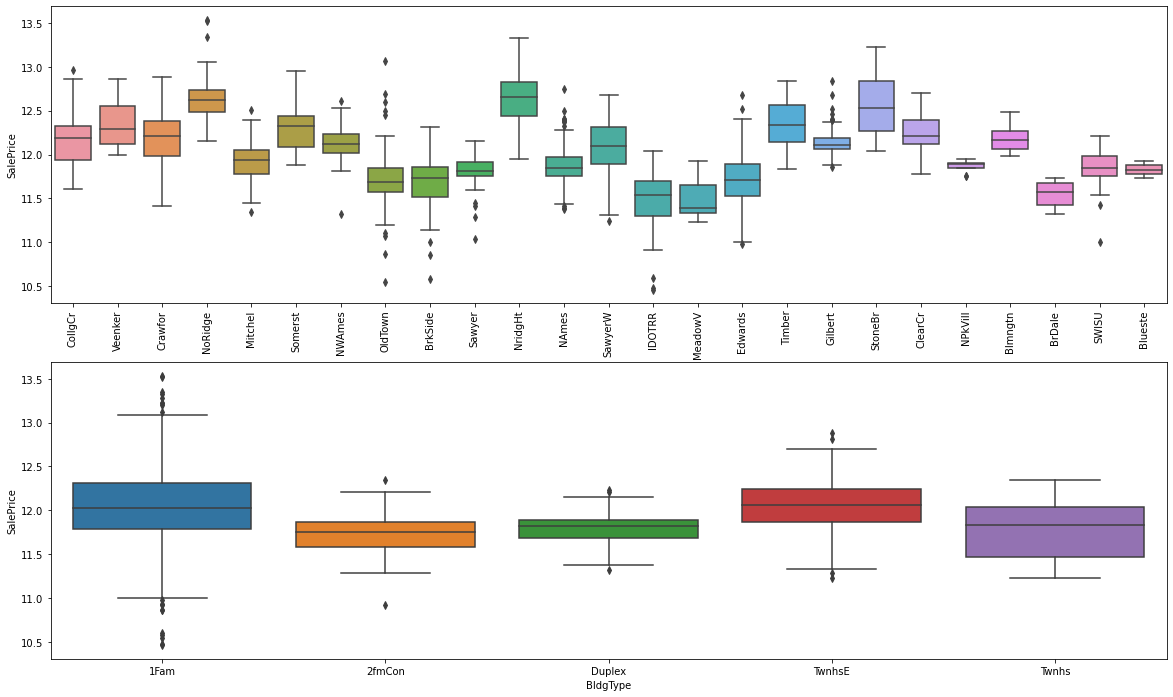

In [73]:
#Check how 'Neighborhood' and 'BldgType' affects SalesPrice
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing_df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing_df)
plt.show()

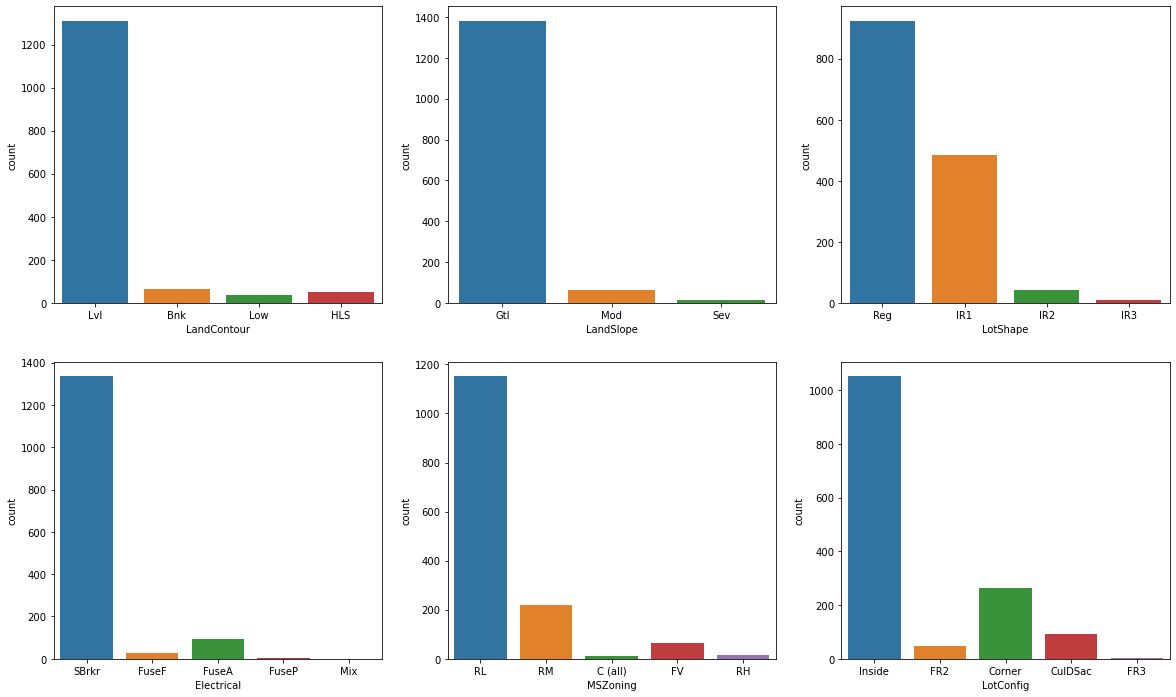

In [74]:
#Analyze by plotting features dependent upon land
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing_df)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing_df)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing_df)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing_df)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing_df)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing_df)
plt.show()

In [75]:
#Dropping highly skewed columns.
housing_df.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

## Derived Metrics:

In [76]:
#Calculating the age of the houses
housing_df['CurrentYear'] = datetime.datetime.now().year
housing_df["Age"] = housing_df['CurrentYear'] - housing_df['YearBuilt']

In [77]:
#Calculating the remodel age of the houses
housing_df["RemodAge"] = housing_df['CurrentYear'] - housing_df['YearRemodAdd']
housing_df.drop(['CurrentYear', 'YearBuilt', 'YearRemodAdd'], axis = 1, inplace = True)

In [78]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape  \
0             2-STORY 1946 & NEWER       RL         65.0     8450      Reg   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600      Reg   
2             2-STORY 1946 & NEWER       RL         68.0    11250      IR1   
3             2-STORY 1945 & OLDER       RL         60.0     9550      IR1   
4             2-STORY 1946 & NEWER       RL         84.0    14260      IR1   

  LotConfig Neighborhood BldgType HouseStyle    OverallQual OverallCond  \
0    Inside      CollgCr     1Fam     2Story           Good     Average   
1       FR2      Veenker     1Fam     1Story  Above Average   Very Good   
2    Inside      CollgCr     1Fam     2Story           Good     Average   
3    Corner      Crawfor     1Fam     2Story           Good     Average   
4       FR2      NoRidge     1Fam     2Story      Very Good     Average   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  \
0             1          Gd             8           0     Attchd       2003.0   
1             1          TA             6           1     Attchd       1976.0   
2             1          Gd             6           1     Attchd       2001.0   
3             1          Gd             7           1     Detchd       1998.0   
4             1          Gd             9           1     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          RFn           2         548           0           61   
1          RFn           2         460         298            0   
2          RFn           2         608           0           42   
3          Unf           3         642           0           35   
4          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0

In [79]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [80]:
#Obtain all categorical columns to form dummy variables
categ_var = housing_df.select_dtypes(include=['object']) 
categ_var.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [81]:
#Obtain all numerical columns
num_var = housing_df.select_dtypes(include=['int64','float64'])
num_var.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Age', 'RemodAge'],
      dtype='object')

In [82]:
#We have following categorical variables
categ_var.shape

(1460, 23)

## Creating Dummy Variables:

In [83]:
#Get dummy variables for categorical variables.
housing_dummy_vars = pd.get_dummies(categ_var,drop_first=True)  # Dummy variables
print(housing_dummy_vars.shape)

(1460, 131)


In [84]:
# concat dummy variables with main dataset
housing_df = pd.concat([housing_df, housing_dummy_vars], axis=1)
housing_df = housing_df.drop(list(categ_var.columns), axis=1)

In [85]:
#Concatenated dummy data
housing_df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Age  RemodAge  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0  12.247694   19        19                                         0   
1  12.109011   46        46                                         0   
2  12.317167   21        20                                         0   
3  11.849398  107        52                                         0   
4  12.429216   22        22                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4            

In [86]:
#Check the shape of the data set.
housing_df.shape

(1460, 165)

In [87]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 165 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(30), uint8(131)
memory usage: 618.3 KB


## Splitting Train and Test data:

In [88]:
# Putting feature variable to X
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   Age  RemodAge  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0   19        19                                         0   
1   46        46                                         0   
2   21        20                                         0   
3  107        52                                         0   
4   22        22                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONV

In [89]:
# Putting response variable to y
y = housing_df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [90]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 164)
X_test Shape: (438, 164)
y_train Shape: (1021,)
y_test Shape: (438,)


### Rescaling the features:

In [91]:
# import the library for min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
#List of important numerical variables needed for data transformation.
num_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Age', 'RemodAge']
print(len(num_var))

33


In [93]:
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210      0.157534  0.019306        0.00    0.082920         0.0   0.169521   
318      0.236301  0.039403        0.16    0.174876         0.0   0.154110   
239      0.106164  0.033981        0.00    0.016655         0.0   0.274401   
986      0.130137  0.017931        0.00    0.000000         0.0   0.207620   
1416     0.133562  0.046139        0.00    0.000000         0.0   0.332620   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210      0.141408  0.113889  0.000000           0.0   0.081860      0.333333   
318      0.220458  0.231481  0.616949           0.0   0.424289      0.333333   
239      0.120295  0.098611  0.333656           0.0   0.201576      0.000000   
986      0.079378  0.145602  0.307022           0.0   0.230015      0.000000   
1416     0.127169  0.202315  0.505569           0.0   0.355880      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
210            0.0  0.333333       0.0         0.250           0.0   
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
210       0.181818    0.000000     0.713692        0.00    0.000000   
318       0.545455    0.333333     0.845455        0.75    0.462623   
239       0.363636    0.333333     0.445455        0.25    0.155148   
986       0.181818    0.000000     0.454545        0.25    0.179831   
1416      0.727273    0.000000     0.645455        0.50    0.394922   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
210     0.000000     0.000000       0.173913        0.0          0.0   
318     0.396733     0.114723       0.260870        0.0          0.0   
239     0.000000     0.267686       0.000000        0.0          0.0   
986     0.459743     0.000000       0.000000        0.0          0.0   
1416    0.000000     0.000000       0.206522        0.0          0.0   

      PoolArea  MiscVal    MoSold  YrSold       Age  RemodAge  \
210        0.0      0.0  0.272727    0.50  0.615942  1.000000   
318        0.0      0.0  0.272727    0.75  0.123188  0.283333   
239        0.0      0.0  0.272727    1.00  0.471014  1.000000   
986        0.0      0.0  0.454545    0.00  0.724638  0.116667   
1416       0.0      0.0  0.272727    1.00  0.905797  1.000000   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
210                                          0   
318                                          0   
239                                          1   
986                                          1   
1416                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
210                                 1   
318                                 0   
239                                 0   
986                                 0   
1416                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
210                                            0   
318                                            0   
239                                            0   
986                                            0   
1416                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
210                                                   0                  
318                                                   0                  
239                                                   0                  
986                                                   0                  
1416                                                  0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
210                     

In [94]:
y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [95]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436     0.133562  0.035192     0.00000    0.109142         0.0   0.106164   
57       0.232877  0.047566     0.00000    0.000000         0.0   0.368151   
780      0.143836  0.029930     0.02375    0.000000         0.0   0.529538   
382      0.198630  0.036338     0.00000    0.000000         0.0   0.401969   
1170     0.188356  0.039309     0.00000    0.092488         0.0   0.245719   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436     0.141408  0.113889  0.000000           0.0   0.081860      0.000000   
57       0.140753  0.112963  0.416465           0.0   0.246349      0.000000   
780      0.202455  0.203935  0.000000           0.0   0.156610      0.000000   
382      0.153682  0.131250  0.415496           0.0   0.261145      0.000000   
1170     0.179378  0.172685  0.000000           0.0   0.130669      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436           0.0  0.333333       0.0         0.375           0.0   
57             0.0  0.666667       0.5         0.375           0.0   
780            0.0  0.666667       0.0         0.375           0.0   
382            0.0  0.666667       0.5         0.375           0.0   
1170           0.0  0.333333       0.0         0.375           0.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1436      0.181818    0.000000     0.672727        0.50    0.372355   
57        0.363636    0.000000     0.945455        0.50    0.398449   
780       0.272727    0.333333     0.863636        0.50    0.283498   
382       0.454545    0.000000     0.963636        0.50    0.450635   
1170      0.272727    0.333333     0.700000        0.25    0.252468   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1436    0.000000     0.000000            0.0        0.0          0.0   
57      0.000000     0.133843            0.0        0.0          0.0   
780     0.256709     0.040153            0.0        0.0          0.0   
382     0.168028     0.101338            0.0        0.0          0.0   
1170    0.236873     0.000000            0.0        0.0          0.0   

      PoolArea  MiscVal    MoSold  YrSold       Age  RemodAge  \
1436  0.000000      0.0  0.363636    0.25  0.282609  0.650000   
57    0.000000      0.0  0.636364    0.00  0.043478  0.100000   
780   0.000000      0.0  0.454545    0.25  0.108696  0.233333   
382   0.000000      0.0  0.272727    0.25  0.028986  0.066667   
1170  0.888889      0.0  0.545455    0.50  0.239130  0.550000   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1436                                         0   
57                                           0   
780                                          0   
382                                          0   
1170                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
1436                                0   
57                                  0   
780                                 0   
382                                 0   
1170                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1436                                           1   
57                                             0   
780                                            1   
382                                            0   
1170                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1436                                                  0                  
57                                                    0                  
780                                                   0                  
382                                                   0                  
1170                                                  0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
1436                    

In [96]:
y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

### Model Building using RFE:

In [97]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [98]:
# Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
#selected top 100 ranked attributes
rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [100]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 18),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 52),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 61),
 ('GarageCars', True, 1),
 ('GarageArea', False, 57),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 26),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 16),
 ('MoSold', False, 63),
 ('YrSold', False, 25),
 ('Age', True, 1),
 ('RemodAge', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 39),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER AL

In [101]:
#Obtain the selected features
support_col = X_train.columns[rfe.support_]
support_col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Age',
       'RemodAge', 'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide',
     

In [102]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[support_col]
X_test_rfe = X_test[support_col]

In [103]:
X_train_rfe.head(3)

LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
210     0.157534  0.019306    0.082920         0.0   0.169521     0.141408   
318     0.236301  0.039403    0.174876         0.0   0.154110     0.220458   
239     0.106164  0.033981    0.016655         0.0   0.274401     0.120295   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210  0.113889  0.000000           0.0   0.081860      0.333333           0.0   
318  0.231481  0.616949           0.0   0.424289      0.333333           0.0   
239  0.098611  0.333656           0.0   0.201576      0.000000           0.0   

     FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
210  0.333333       0.0           0.0      0.181818    0.000000        0.00   
318  0.666667       0.5           0.0      0.545455    0.333333        0.75   
239  0.333333       0.5           0.0      0.363636    0.333333        0.25   

     WoodDeckSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea       Age  \
210    0.000000       0.173913        0.0          0.0       0.0  0.615942   
318    0.396733       0.260870        0.0          0.0       0.0  0.123188   
239    0.000000       0.000000        0.0          0.0       0.0  0.471014   

     RemodAge  MSSubClass_1-STORY 1945 & OLDER  \
210  1.000000                                1   
318  0.283333                                0   
239  1.000000                                0   

     MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
210                                                  0                  
318                                                  0                  
239                                                  0                  

     MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
210                                             0   
318                                             0   
239                                             0   

     MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
210                                                  0      
318                                                  0      
239                                                  0      

     MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1946 & NEWER  \
210                                0                                0   
318                                0                                1   
239                                0                                0   

     MSSubClass_2-STORY PUD - 1946 & NEWER  \
210                                      0   
318                                      0   
239                                      0   

     MSSubClass_DUPLEX - ALL STYLES AND AGES  \
210                                        0   
318                                        0   
239                                        0   

     MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSZoning_FV  \
210                                                  0             0   
318                                                  0             0   
239                                                  0             0   

     MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR3  LotConfig_FR2  \
210            0            1            0             0              0   
318            0            1            0             0              0   
239            0            1            0             0              0   

     LotConfig_FR3  Neighborhood_BrkSide  Neighborhood_ClearCr  \
210              0                     0                     0   
318              0                     0                     0   
239              0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
210                     0                     1                     0   
318                     0                     0                     0   
239                     0                   

In [104]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [105]:
# Predictions on the basis of the model
y_pred = lm.predict(X_train_rfe)
y_pred

array([11.37889528, 12.72018099, 11.74463987, ..., 12.75267792,
       12.56079435, 11.65534163])

In [106]:
#Print intercept and coeffecient
print(lm.intercept_)
print(lm.coef_)

3987075427.0943165
[-1.78892443e-01  3.73008056e-01 -7.84058689e+11 -2.04766568e+11
 -3.24514723e+11  8.48794931e+11 -2.60972209e+11 -1.24747132e+11
 -3.11112703e+10  3.14374856e+11  1.62605286e-01  5.14640808e-02
  1.65756226e-01  7.34634399e-02 -2.06031799e-01  1.01760864e-01
  8.33740234e-02  2.24628448e-01  8.75244141e-02  9.99889374e-02
  1.33491516e-01  8.84628296e-02 -1.97875977e-01 -2.69546509e-01
 -7.55920410e-02 -1.46316528e-01 -7.52410889e-02 -9.40761566e-02
  2.20053388e+10  5.77201843e-02 -3.87878418e-02 -1.55166626e-01
 -4.52208450e+10 -1.15949631e-01  3.55957031e-01  3.87781143e-01
  3.56842041e-01  2.98858643e-01 -6.34002686e-02 -4.35943604e-02
 -3.90553474e-02  6.41326904e-02  1.12541199e-01  1.41632080e-01
 -6.52570724e-02 -9.81369019e-02  1.37443542e-01  1.29592896e-01
  1.14158630e-01  1.25900269e-01  6.80694580e-02 -2.20053388e+10
  4.52208450e+10 -5.32684326e-02  4.07409668e-02 -4.63867188e-02
 -7.54852295e-02  2.16674805e-01 -1.15009308e-01  5.27954102e-02
 -3.91

### R2_SCORE:

In [107]:
#Obtain the r2_score, sum of squares and mean square error for RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss2_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.9192111323051078
-6.76906745451556e+18
0.012699301203900424
1.1137831477519508e+18


In [108]:
#Model evaluation metrics
r2_score(y_train, y_pred)

0.9192111323051078

In [109]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
RSS = np.sum(np.square(y_train - y_pred))
print(RSS)
MSE = mean_squared_error(y_train, y_pred)
print(MSE)
# Root Mean Squared Error
RMSE = MSE**0.5
print(RMSE)

12.965986529182333
0.012699301203900424
0.11269117624685805


## Advance Regression Using Ridge and Lasso Model

## Ridge Model:

In [110]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
ridge_cv.best_estimator_ 

Ridge(alpha=2.0)

In [112]:
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=200]
ridge_results.sort_values(by=['rank_test_score'],ascending=True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
14       0.007200      0.000750         0.004000        0.001265         2.0   
15       0.009004      0.002195         0.003796        0.000747         3.0   
13       0.008601      0.001355         0.003393        0.001349         1.0   
12       0.009201      0.001942         0.004409        0.000480         0.9   
16       0.006202      0.000400         0.002598        0.000491         4.0   

            params  split0_test_score  split1_test_score  split2_test_score  \
14  {'alpha': 2.0}          -0.094063          -0.094777          -0.102817   
15  {'alpha': 3.0}          -0.093139          -0.094912          -0.102842   
13  {'alpha': 1.0}          -0.095230          -0.094673          -0.103057   
12  {'alpha': 0.9}          -0.095401          -0.094665          -0.103096   
16  {'alpha': 4.0}          -0.092447          -0.095180          -0.102980   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
14          -0.085125          -0.094305        -0.094217        0.005603   
15          -0.085368          -0.095002        -0.094253        0.005567   
13          -0.085076          -0.093390        -0.094285        0.005720   
12          -0.085150          -0.093311        -0.094325        0.005717   
16          -0.085707          -0.095537        -0.094370        0.005566   

    rank_test_score  split0_train_score  split1_train_score  \
14                1           -0.079754           -0.073468   
15                2           -0.080780           -0.075143   
13                3           -0.078454           -0.071240   
12                4           -0.078324           -0.070981   
16                5           -0.081634           -0.076517   

    split2_train_score  split3_train_score  split4_train_score  \
14           -0.074630           -0.080626           -0.080115   
15           -0.075796           -0.081412           -0.080831   
13           -0.073046           -0.079746           -0.079215   
12           -0.072872           -0.079642           -0.079107   
16           -0.076746           -0.082167           -0.081499   

    mean_train_score  std_train_score  
14         -0.077719         0.003031  
15         -0.078793         0.002730  
13         -0.076340         0.003499  
12         -0.076185         0.003553  
16         -0.079713         0.002527

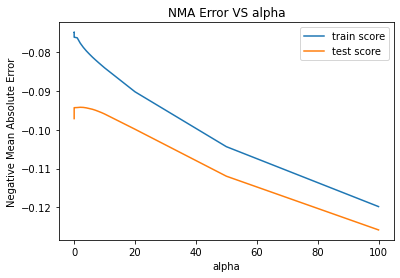

In [113]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("NMA Error VS alpha")
plt.legend(['train score', 'test score'], loc='best')
plt.show()

In [114]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [115]:
#Optimum Value of Ridge model
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.89593132e-02,  1.49764325e-01,  1.11745931e-02,  3.79981923e-02,
        3.97290047e-02,  8.79411842e-02,  7.83065395e-02,  2.37200845e-01,
        2.03732032e-01, -4.21232395e-03,  2.77333772e-01,  1.32305578e-01,
        2.90384763e-02,  1.81094147e-01,  8.59641724e-02,  6.79183903e-02,
       -1.33199781e-01,  1.56669077e-01,  1.11503503e-01, -6.35475368e-03,
        1.60252110e-01,  7.97251583e-02,  8.78392250e-02, -6.28011031e-03,
        6.66220254e-02,  6.68614818e-02,  7.07786598e-02, -9.78680766e-02,
       -2.23406699e-02,  2.06846221e-03, -2.55046251e-02, -1.06320067e-01,
       -7.39942547e-02,  3.06170976e-02, -9.10514539e-02,  3.70726447e-02,
       -1.03726973e-02, -8.67052265e-03,  4.16641886e-04,  6.50049652e-02,
        4.82806034e-02, -5.23672557e-03, -5.39300264e-02,  1.44954164e-02,
       -4.36005831e-02,  2.47346759e-02,  1.64799832e-03,  1.53575148e-01,
        1.43680277e-01,  1.46009397e-01,  1.16038866e-01,  3.13485510e-02,
       -4.69117450e-02,  

In [116]:
#Score of ridge for train data
ridge.score(X_train,y_train)

0.9188970502774269

In [117]:
#Score of ridge for test data
ridge.score(X_test,y_test)

0.8844432028774123

In [118]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.572),
 ('LotFrontage', -0.241),
 ('LotArea', -0.213),
 ('MasVnrArea', -0.133),
 ('BsmtFinSF1', -0.125),
 ('BsmtFinSF2', -0.106),
 ('BsmtUnfSF', -0.098),
 ('TotalBsmtSF', -0.096),
 ('1stFlrSF', -0.092),
 ('2ndFlrSF', -0.091),
 ('LowQualFinSF', -0.088),
 ('GrLivArea', -0.085),
 ('BsmtFullBath', -0.082),
 ('BsmtHalfBath', -0.082),
 ('FullBath', -0.082),
 ('HalfBath', -0.08),
 ('BedroomAbvGr', -0.08),
 ('KitchenAbvGr', -0.08),
 ('TotRmsAbvGrd', -0.077),
 ('Fireplaces', -0.077),
 ('GarageYrBlt', -0.077),
 ('GarageCars', -0.076),
 ('GarageArea', -0.076),
 ('WoodDeckSF', -0.076),
 ('OpenPorchSF', -0.075),
 ('EnclosedPorch', -0.074),
 ('3SsnPorch', -0.07),
 ('ScreenPorch', -0.068),
 ('PoolArea', -0.067),
 ('MiscVal', -0.066),
 ('MoSold', -0.066),
 ('YrSold', -0.065),
 ('Age', -0.064),
 ('RemodAge', -0.059),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.056),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.054),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.054),
 ('MSSubClass_

## Lasso Model:

In [119]:
#Lasso Model
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [120]:
lasso_cv.best_estimator_ 

Lasso(alpha=0.0006)

In [121]:
#Obtain the cv results
lasso_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_results.sort_values(by=['rank_test_score'],ascending=True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
1       0.019399      0.002797         0.004199        0.001166      0.0006   
2       0.014999      0.001096         0.003600        0.000801      0.0008   
3       0.014799      0.001940         0.005201        0.002995       0.001   
0       0.127400      0.028513         0.005399        0.000800     0.00006   
4       0.017600      0.003498         0.004402        0.001020       0.002   

              params  split0_test_score  split1_test_score  split2_test_score  \
1  {'alpha': 0.0006}           0.891111           0.794050           0.839791   
2  {'alpha': 0.0008}           0.890524           0.799205           0.839828   
3   {'alpha': 0.001}           0.888311           0.802234           0.837947   
0   {'alpha': 6e-05}           0.874979           0.787960           0.846991   
4   {'alpha': 0.002}           0.876364           0.803688           0.822198   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
1           0.902100           0.905211         0.866452        0.043206   
2           0.901025           0.901301         0.866377        0.040547   
3           0.898581           0.895878         0.864590        0.038197   
0           0.894013           0.906195         0.862028        0.042080   
4           0.879783           0.869631         0.850333        0.031256   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.908759            0.923954   
2                2            0.904238            0.918969   
3                3            0.899342            0.914421   
0                4            0.927213            0.938012   
4                5            0.878436            0.893568   

   split2_train_score  split3_train_score  split4_train_score  \
1            0.917912            0.906470            0.903899   
2            0.913025            0.901811            0.897856   
3            0.908663            0.897430            0.892322   
0            0.934142            0.923443            0.919802   
4            0.887710            0.876626            0.870466   

   mean_train_score  std_train_score  
1          0.912199         0.007541  
2          0.907180         0.007715  
3          0.902436         0.007992  
0          0.928522         0.006711  
4          0.881361         0.008234

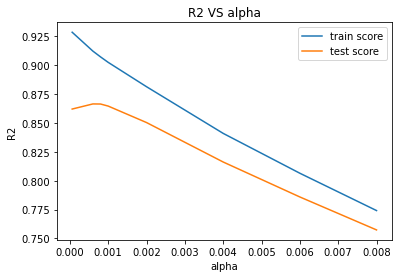

In [122]:
# plotting mean test and train scores with optimum alpha 
lasso_results['param_alpha'] =lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 VS alpha")
plt.legend(['train score', 'test score'], loc='best')
plt.show()

In [123]:
#optimum alpha

alpha =0.0006

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [124]:
#Lasso co-efficients
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.29137885e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  9.12821601e-01,  1.32907178e-01,
        0.00000000e+00,  1.55322973e-01,  7.01770502e-02,  0.00000000e+00,
       -8.77036160e-02,  1.25336165e-01,  1.25372302e-01,  0.00000000e+00,
        2.31283441e-01,  0.00000000e+00,  6.70768765e-02,  0.00000000e+00,
        1.47896647e-03,  0.00000000e+00,  4.60191117e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.77297793e-02, -1.05093913e-01,
       -7.82852193e-02,  1.01949810e-02, -8.82444389e-02,  5.28799934e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.28626045e-02, -0.00000000e+00, -6.38319950e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.26215687e-02,
        6.41838499e-03,  4.45558273e-02,  0.00000000e+00,  1.97081313e-02,
       -0.00000000e+00,  

In [125]:
#Score for the train data
lasso.score(X_train,y_train)

0.9070809800048087

In [126]:
#Score for the test data
lasso.score(X_test,y_test)

0.8811086411902345

In [127]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.619),
 ('LotFrontage', -0.224),
 ('LotArea', -0.208),
 ('MasVnrArea', -0.118),
 ('BsmtFinSF1', -0.105),
 ('BsmtFinSF2', -0.099),
 ('BsmtUnfSF', -0.099),
 ('TotalBsmtSF', -0.088),
 ('1stFlrSF', -0.088),
 ('2ndFlrSF', -0.079),
 ('LowQualFinSF', -0.078),
 ('GrLivArea', -0.076),
 ('BsmtFullBath', -0.073),
 ('BsmtHalfBath', -0.069),
 ('FullBath', -0.067),
 ('HalfBath', -0.064),
 ('BedroomAbvGr', -0.062),
 ('KitchenAbvGr', -0.054),
 ('TotRmsAbvGrd', -0.05),
 ('Fireplaces', -0.049),
 ('GarageYrBlt', -0.048),
 ('GarageCars', -0.047),
 ('GarageArea', -0.046),
 ('WoodDeckSF', -0.045),
 ('OpenPorchSF', -0.045),
 ('EnclosedPorch', -0.041),
 ('3SsnPorch', -0.035),
 ('ScreenPorch', -0.033),
 ('PoolArea', -0.031),
 ('MiscVal', -0.03),
 ('MoSold', -0.027),
 ('YrSold', -0.026),
 ('Age', -0.023),
 ('RemodAge', -0.021),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.019),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.018),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.016),
 ('MSSubClas

In [128]:
#Prediction of training data
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

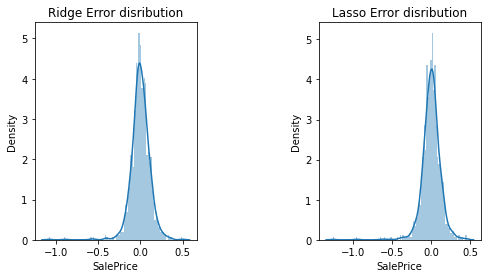

In [129]:
#Error distribution in Train dataset
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Ridge Error disribution')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Lasso Error disribution')

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [130]:
print('R2_score of train dataset:')
print('R2_score-Ridge:', r2_score(y_train, y_pred_ridge_train))
print('R2_score-Lasso:', r2_score(y_train, y_pred_lasso_train))

R2_score of train dataset:
R2_score-Ridge: 0.9188970502774269
R2_score-Lasso: 0.9070809800048087


In [131]:
#Prediction of test dataset
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

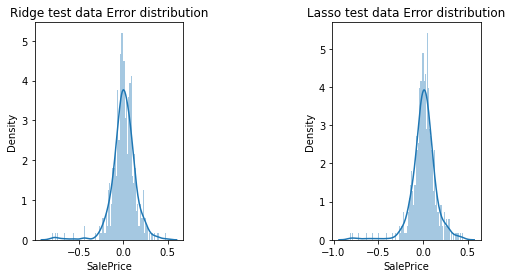

In [132]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Ridge test data Error distribution')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Lasso test data Error distribution')

plt.subplots_adjust(wspace = 1)
plt.show()

In [133]:
print('R2_score in train dataset:')
print('R2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('R2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('R2_score in test dataset:')
print('R2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('R2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

R2_score in train dataset:
R2_score for ridge: 0.92
R2_score for lasso: 0.91
R2_score in test dataset:
R2_score for ridge: 0.88
R2_score for lasso: 0.88


In [138]:
# Optimim value of alpha is 0.6

alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.11702657,  0.23746397, -0.01589386,  0.0050849 ,  0.02847682,
        0.08151704,  0.04273287,  0.31436023,  0.24697906,  0.00069612,
        0.35903275,  0.14000884,  0.03929908,  0.1745029 ,  0.08318821,
        0.04711645, -0.18093842,  0.13579136,  0.09738231, -0.0115189 ,
        0.1817449 ,  0.05250241,  0.08597662, -0.01432475,  0.08475144,
        0.08892786,  0.08025664, -0.15438829, -0.03099994,  0.00301654,
       -0.02339521, -0.13530019, -0.06799153,  0.0356384 , -0.09559021,
        0.03162369, -0.01947161, -0.02269545,  0.00407736,  0.06619003,
        0.03625082, -0.01493001, -0.06234211,  0.0215002 , -0.04145338,
        0.0330481 ,  0.00212581,  0.24582961,  0.24217681,  0.2352215 ,
        0.20499628,  0.02943279, -0.04950108,  0.01305507,  0.03894847,
       -0.05172219, -0.06337304, -0.00520588, -0.01800938, -0.03048404,
        0.04201911,  0.09778062,  0.03143087,  0.13839405, -0.07097808,
        0.03582351, -0.05757948, -0.13880379, -0.00468671, -0.00

In [141]:
# Displaying Ridge  model parameters and their cofficient

param = list(ridge.coef_ )
param = [round(x, 3) for x in param]
cols = X_train.columns

param = pd.DataFrame(list(zip(cols, param)))
param.columns = ['Variable', 'Ridge Coeff']
param.sort_values('Ridge Coeff', ascending=False).head(10)

Variable  Ridge Coeff
10              GrLivArea        0.359
7                1stFlrSF        0.314
8                2ndFlrSF        0.247
47            MSZoning_FV        0.246
48            MSZoning_RH        0.242
1                 LotArea        0.237
49            MSZoning_RL        0.235
92  OverallQual_Excellent        0.223
50            MSZoning_RM        0.205
20             GarageCars        0.182

In [144]:
# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

# R-Squarred
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

# RSS

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)

# Mse

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

print("R-Square for Training Set: " , metric2[0])
print("R-Square for Test Set: " , metric2[1])
print("RSS for Training Set: " , metric2[2])
print("RSS for Test Set: " , metric2[3])
print("MSE for Training Set: " , metric2[4])
print("MSE for Test Set: " , metric2[5])

R-Square for Training Set:  0.9226027325434681
R-Square for Test Set:  0.8836168228845077
RSS for Training Set:  12.4216610019447
RSS for Test Set:  8.387569267723615
MSE for Training Set:  0.11030036900433453
MSE for Test Set:  0.13838244659089946


In [147]:
# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
# R-squarred
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)
# Rss
rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)
# Mse
mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

print("R-Square for Training Set: " , metric3[0])
print("R-Square for Test Set: " , metric3[1])
print("RSS for Training Set: " , metric3[2])
print("RSS for Test Set: " , metric3[3])
print("MSE for Training Set: " , metric3[4])
print("MSE for Test Set: " , metric3[5])

R-Square for Training Set:  0.9070809800048087
R-Square for Test Set:  0.8811086411902345
RSS for Training Set:  14.91278187129046
RSS for Test Set:  8.568330338336738
MSE for Training Set:  0.12085551175732871
MSE for Test Set:  0.13986564278882888


In [149]:
## different metrics and their comparrision

# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }


rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ rg_metric, ls_metric], axis = 1)

final_metric

Ridge Regression  Lasso Regression
0          0.922603          0.907081
1          0.883617          0.881109
2         12.421661         14.912782
3          8.387569          8.568330
4          0.110300          0.120856
5          0.138382          0.139866

## Conclusion :

- A house's price is affected by the seller's **condition and garage features, the kitchen's quality, the heating's quality, and the basement's features.** These factors affect the price of the houses..
</br>
- Variables that describe the price of a house:
</br>
    In both advanced regression models, these variables describe the price of a house very well with their coefficient values. Coefficients with positive values result in a higher sale price.
</br>
- Determine the optimal value of lambda for ridge and lasso regression:

 **Optimal Value of lamda for ridge : 2** </br>
 **Optimal Value of lamda for Lasso : 0.0006**

R2 score for both Ridge and Lasso regression.
-  Ridge : Train :92 Test :88
-  Lasso : Train :91 Test :88
</br>

**Lasso regression** is a better option in this case than the Ridge regression model. By using these positive co-efficient values, positive features can be highlighted and features that decrease the price can be improved.